# Séance 5 - *correction*

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

## Importation des données dans python

In [2]:
spotify = pandas.read_csv("https://fxjollois.github.io/donnees/spotify_dataset.csv")
spotify

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,popularity,decade
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,173533,3,32.94975,9,1,60s
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,213613,4,48.82510,10,0,60s
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,223960,4,37.22663,12,0,60s
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,157907,4,24.75484,8,0,60s
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,245600,4,21.79874,14,0,60s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,10s
41095,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,10s
41096,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,10s
41097,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,10s


## Création d'un sous-ensemble

Ici, on ne garde donc que les variables ayant des valeurs entre 0 et 1, sauf donc `mode` et `popularity` qui sont des booléens, et donc pas intéressantes dans notre cas.

In [3]:
vars = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
spotify_01 = spotify.filter(vars)
spotify_01

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.417,0.620,0.0403,0.4900,0.000000,0.0779,0.8450
1,0.498,0.505,0.0337,0.0180,0.107000,0.1760,0.7970
2,0.657,0.649,0.0380,0.8460,0.000004,0.1190,0.9080
3,0.590,0.545,0.1040,0.7060,0.024600,0.0610,0.9670
4,0.515,0.765,0.1240,0.8570,0.000872,0.2130,0.9060
...,...,...,...,...,...,...,...
41094,0.172,0.358,0.0342,0.8860,0.966000,0.3140,0.0361
41095,0.910,0.366,0.0941,0.0996,0.000000,0.2610,0.7400
41096,0.719,0.804,0.0355,0.0132,0.000003,0.1390,0.6050
41097,0.600,0.177,0.0561,0.9890,0.868000,0.1490,0.5600


## Réduction des données à 100 classes avec $k$-means

On choisit donc de réduire les 41099 chansons en 100 classes, en espérant que la perte d'informations soit minime.

In [4]:
kmeans_100 = KMeans(n_clusters = 100).fit(spotify_01)

### Part d'inertie expliquée avec 100 classes

On remarque ici qu'on ne perd que moins de 11% de l'information en réduisant en 100 classes.

In [5]:
kmeans_1 = KMeans(n_clusters = 1).fit(spotify_01)

part_100 = 1 - kmeans_100.inertia_ / kmeans_1.inertia_

print("Part : " + str(round(part_100 * 100, 2)) + "%")

Part : 89.19%


### Centres des 100 classes

On récupère les 100 centres des classes, afin de les utiliser par la suite pour la recherche du nombre de classes.

In [6]:
centres_100 = pandas.DataFrame(kmeans_100.cluster_centers_, columns = spotify_01.columns)
centres_100

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.478560,0.537956,0.068660,0.772374,0.772165,0.703824,0.641714
1,0.451591,0.645919,0.047008,0.068920,0.014126,0.143979,0.494129
2,0.385383,0.385307,0.038399,0.778508,0.013242,0.137563,0.465645
3,0.221481,0.131162,0.043205,0.901360,0.493864,0.136832,0.091502
4,0.602499,0.501547,0.053633,0.572271,0.007385,0.366327,0.811101
...,...,...,...,...,...,...,...
95,0.323341,0.330380,0.074243,0.872951,0.805122,0.663817,0.191879
96,0.264399,0.255392,0.039613,0.150655,0.827552,0.129161,0.118575
97,0.498185,0.501960,0.050507,0.792948,0.012045,0.183690,0.718803
98,0.617356,0.471818,0.447212,0.727136,0.020360,0.197005,0.644098


## Choix du nombre de classes

Ici, nous allons utiliser 2 méthodes pour rechercher le nombre de classes, en utilisant les 100 centres de classes :

- CAH avec l'analyse du dendrogramme
- Calcul des $r^2$ et $PseudoF$ pour $K=1,\ldots,10$ avec $k$-means

### Dendrogramme

A la lecture de celui-ci, on est en droit d'hésiter entre 2 et 4 classes.

In [7]:
hac = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
hac.fit(centres_100)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [8]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = numpy.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

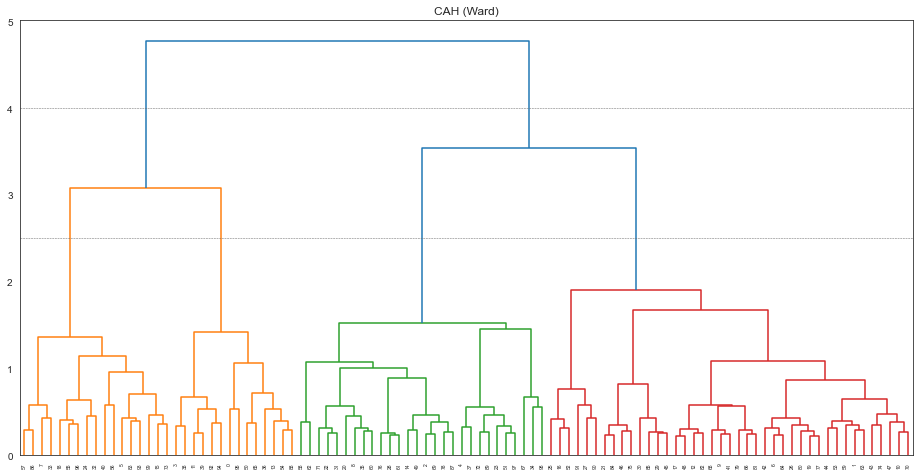

In [9]:
plt.figure(figsize = (16, 8))
plt.title("CAH (Ward)")
plot_dendrogram(hac)
plt.axhline(y = 4, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 2.5, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()

### Et avec $r^2$ et $PseudoF$

Le premier critère, $r^2$, n'est pas totalement utile pour choisir entre 2 et 4 classes. Au contraire, la lecture du $PseudoF$ nous indique qu'il faut clairement choisir 4 classes.

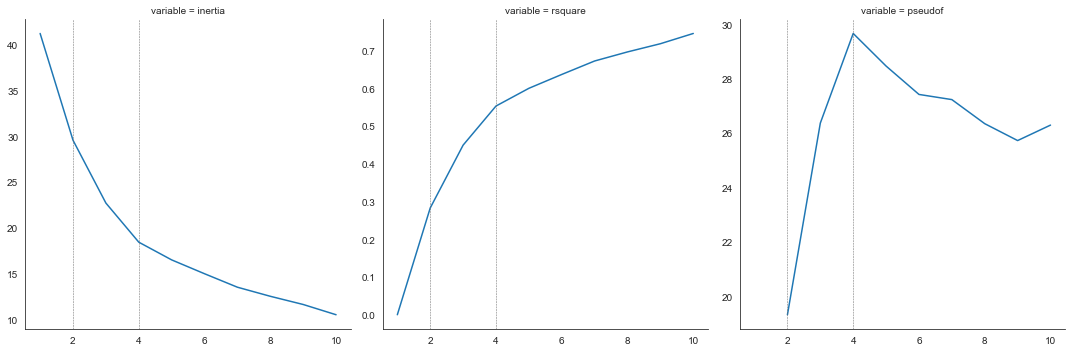

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(centres_100)
    inertia = inertia + [kmeans.inertia_]
rsquare = [(inertia[0] - i) / inertia[0] for i in inertia]
criteres = pandas.DataFrame({
    "k": range(1, 11), 
    "inertia": inertia,
    "rsquare": rsquare,
    "pseudof": [(rsquare[k-1] / k) / ((1 - rsquare[k-1]) / (centres_100.shape[0] - k)) if k > 1 else None for k in range(1, 11)]
})

g = seaborn.FacetGrid(data = criteres.melt(id_vars = "k"), col = "variable", sharey = False, 
                      height = 5, aspect = 1)
g.map_dataframe(seaborn.lineplot, x = "k", y = "value")
g.map(plt.axvline, x = 2, linewidth = .5, color = "dimgray", linestyle = "--")
g.map(plt.axvline, x = 4, linewidth = .5, color = "dimgray", linestyle = "--")
g.add_legend()
plt.show()

### Conclusion

On va plutôt choisir $K=4$ classes

## Calcul de la partition avec $k$-means

Pour calculer notre partition à 4 classes, nous utilisons donc $k$-means, en le lançant plusieurs fois avec une initialisation aléatoire. Le paramètre `random_state` permet d'utiliser toujours la même suite de nombre aléatoire (ce qui est utile pour la reproduction de ce notebook, mais pas forcément dans un cadre professionnel).

In [11]:
kmeans_4 = KMeans(n_clusters = 4, init = "random", n_init = 20, random_state = 123456).fit(spotify_01)

### Part d'inertie expliquée avec 4 classes

En réduisant les données en 4 classes, nous ne gardons au final que 54% de l'information, ce qui est tout de même important.

In [12]:
part_4 = 1 - kmeans_4.inertia_ / kmeans_1.inertia_

print("Part : " + str(round(part_4 * 100, 2)) + "%")

Part : 54.11%


## Description des classes

En analysant les centres des classes, ainsi que les différents graphiques ci-dessous, nous remarquons que les classes se caractèrisent ainsi :

- **classe 0** : chansons peu énergiques, mais plutôt acoustiques et instrumentales
- **classe 1** : chansons plutôt dansantes et assez énergiques, mais pas instrumentales
- **classe 2** : chansons très énergiques et instrumentales
- **classe 3** : chansons acoustiques et non instrumentales

In [13]:
pandas.DataFrame(kmeans_4.cluster_centers_, columns = spotify_01.columns).round(2)

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.37,0.23,0.05,0.86,0.80,0.16,0.28
1,0.60,0.72,0.08,0.13,0.02,0.20,0.62
2,0.48,0.73,0.07,0.11,0.74,0.21,0.46
3,0.51,0.39,0.07,0.70,0.02,0.21,0.51


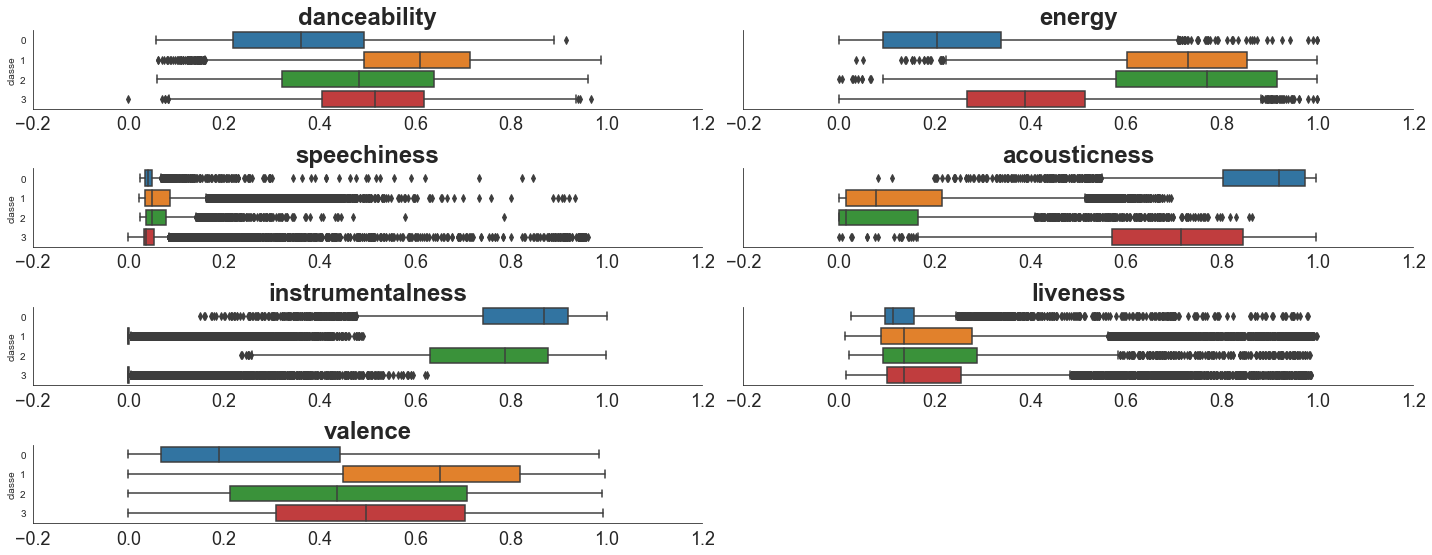

In [14]:
g = seaborn.catplot(
    data = spotify_01.assign(classe = [str(v) for v in kmeans_4.labels_]) \
                .sort_values(by = ["classe"]) \
                .melt(id_vars = "classe"),
    x = "value", y = "classe",
    kind = "box",
    col = "variable", col_wrap = 2, sharex = False,
    height = 2, aspect = 5
)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "")
plt.show()

### Représentation sur le plan factoriel

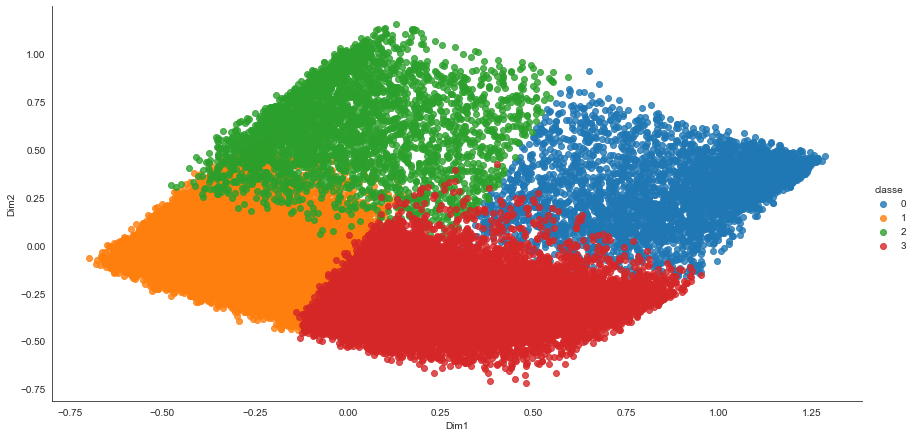

In [15]:
pca = PCA(n_components = 2).fit(spotify_01)
spotify_pca_row = pandas.DataFrame(pca.transform(spotify_01), columns = ["Dim1", "Dim2"])
g_pca = seaborn.lmplot(
    data = spotify_pca_row.assign(classe = kmeans_4.labels_), 
    x = "Dim1", y = "Dim2", hue = "classe", fit_reg = False, 
    height = 6, aspect = 2)
plt.show()

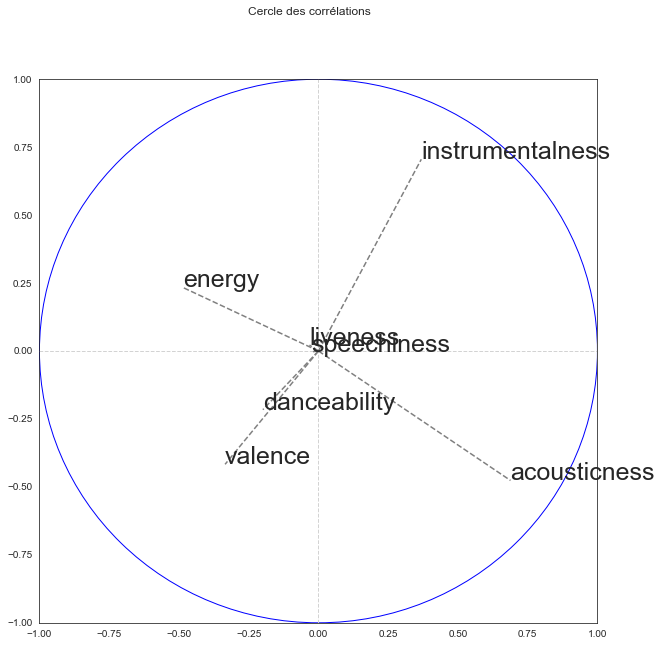

In [16]:
coordvar_df = pandas.DataFrame(pca.components_.T, 
                               columns=['PC'+str(i+1) for i in range(spotify_pca_row.shape[1])], 
                               index=spotify_01.columns)

fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(spotify_01.shape[1]):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC2"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC2"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

### Et les autres variables

> Ne sont présentés ici que les graphiques montrant des informations intéressantes dans le comportement des classes sur les variables n'ayant pas participé au calcul de la partition.

In [17]:
spotify_cl = spotify.assign(classe = kmeans_4.labels_)

#### Mode

Les classes 1 et 3 semblent avoir une part de chansons en mode 1 plus importantes.

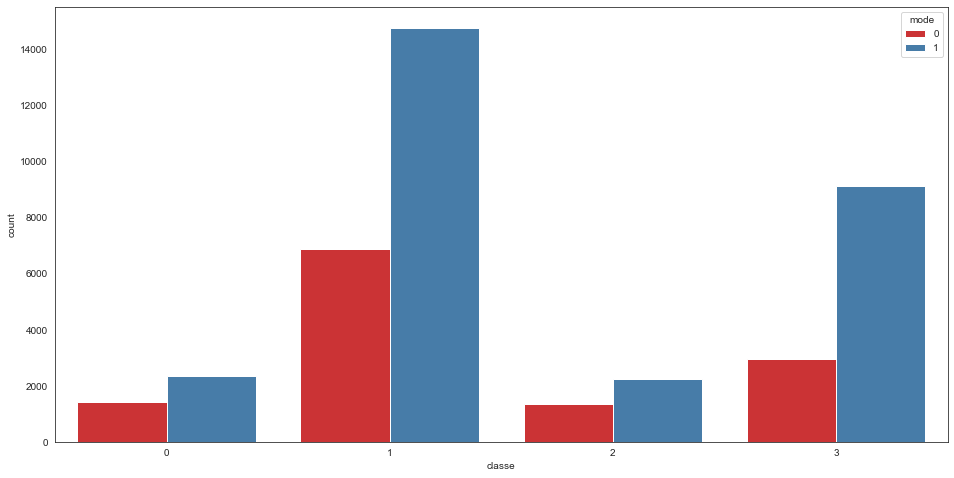

In [18]:
plt.figure(figsize = (16,8))
seaborn.countplot(data = spotify_cl, x = "classe", hue = "mode", palette = "Set1")
plt.show()

#### Popularité

Dans les classes 0 et 2, nous avons majoritairement des chansons peu populaires (modalité 0). Alors que dans la classe 1, c'est le cas pour une majorité.

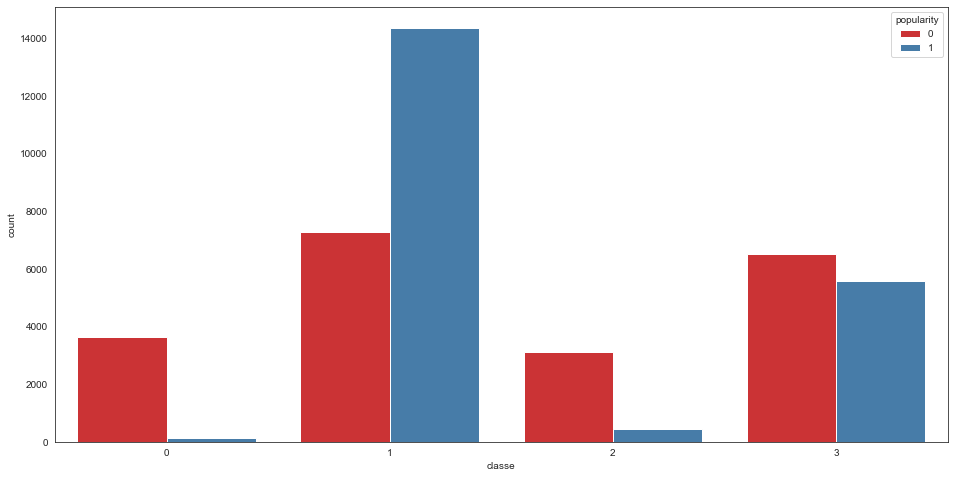

In [19]:
plt.figure(figsize = (16,8))
seaborn.countplot(data = spotify_cl, x = "classe", hue = "popularity", palette = "Set1")
plt.show()

#### Décennie

Les chansons de la classe 3 et de la classe 1 dans une moindre mesure semblent plus anciennes en générales.

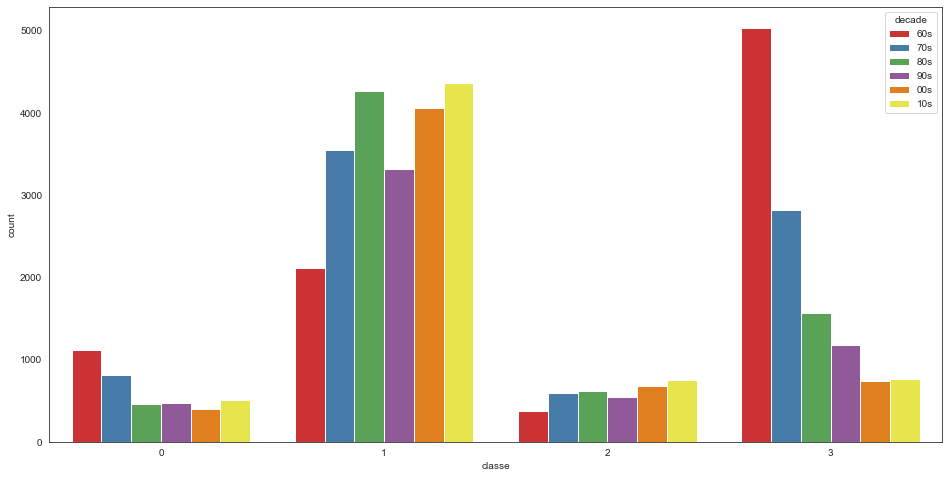

In [20]:
plt.figure(figsize = (16,8))
seaborn.countplot(data = spotify_cl, x = "classe", hue = "decade", palette = "Set1")
plt.show()

#### Niveau sonore

Les chansons de la classe 0 semblent beaucoup moins fortes à l'écoute que pour les autres classes.

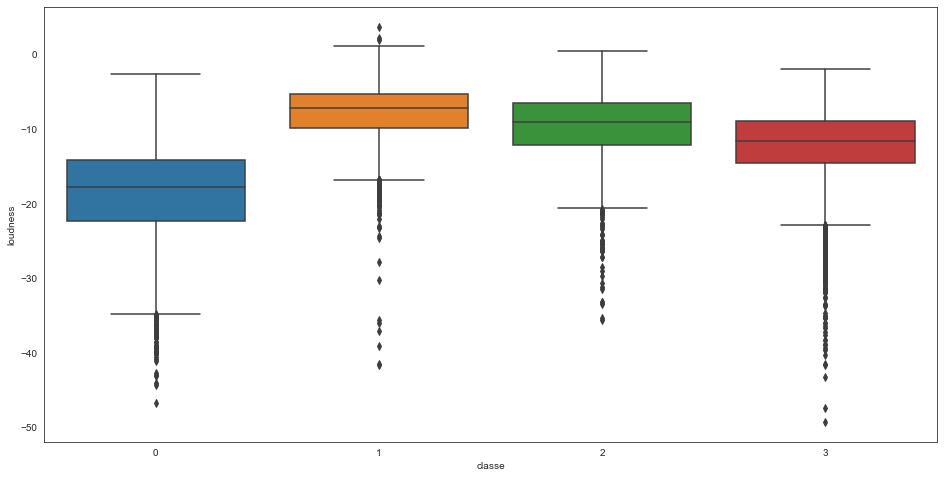

In [21]:
plt.figure(figsize = (16,8))
seaborn.boxplot(data = spotify_cl, x = "classe", y = "loudness")
plt.show()

#### Tempo

Il ne semble pas y avoir de différence flagrante dans le tempo utilisé pour les chansons dans les différentes classes.

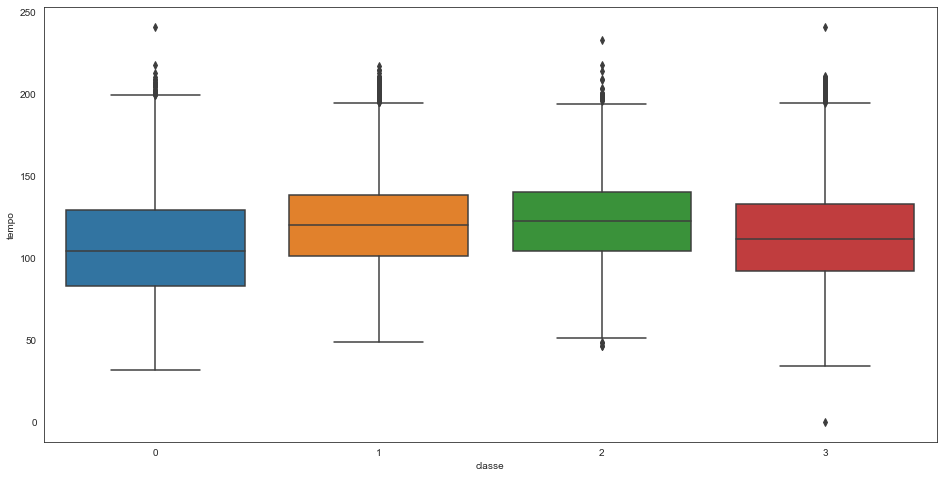

In [22]:
plt.figure(figsize = (16,8))
seaborn.boxplot(data = spotify_cl, x = "classe", y = "tempo")
plt.show()

#### Durée

> Ici, nous avons utilisé un axe logarthmique (en $y$) pour pouvoir représenter les différences entres les classes dans être impacté par les valeurs extrêmes (quelques chansons durent plus de 60 minutes)

Pas de différence notable non plus ici.

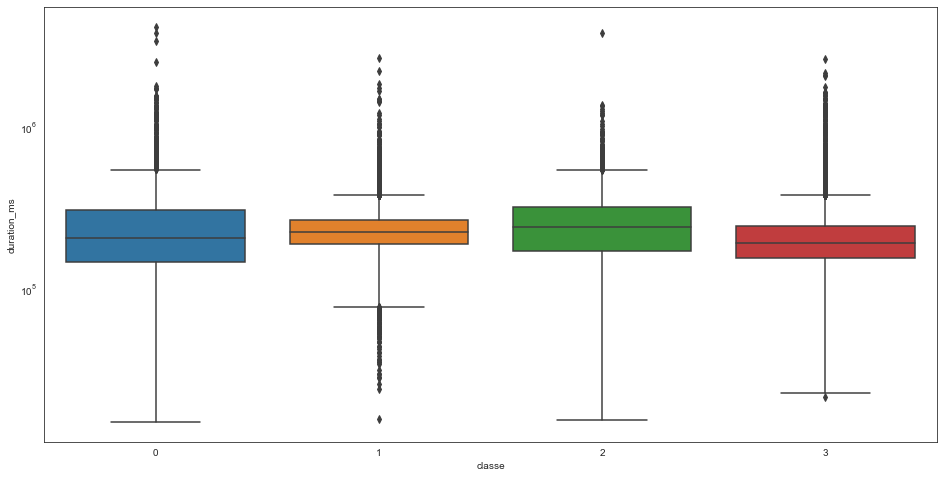

In [23]:
f, ax = plt.subplots(figsize=(16, 8))
ax.set_yscale("log")

seaborn.boxplot(data = spotify_cl, x = "classe", y = "duration_ms")
plt.show()

##### Représentation de la durée en minutes pour chaque classe

On voit très bien ici que certaines *chansons* durent plus de 30 minutes.

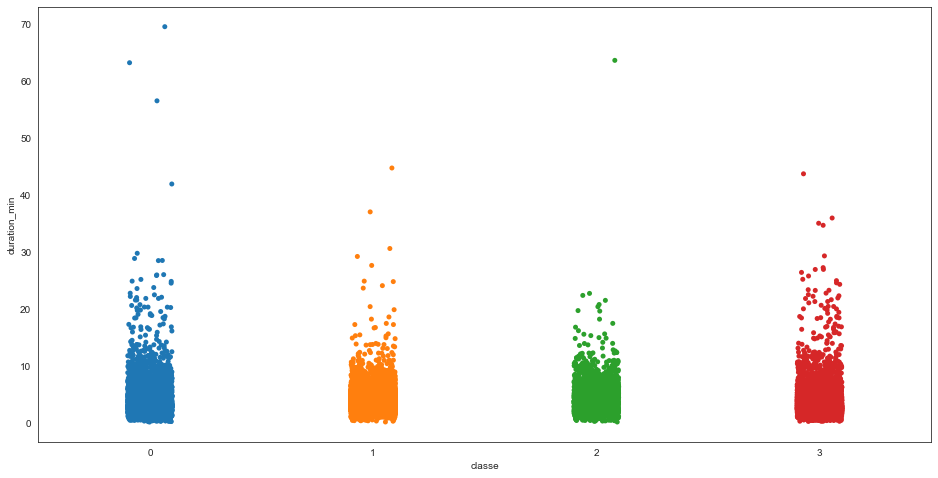

In [24]:
plt.figure(figsize = (16,8))
seaborn.stripplot(data = spotify_cl.assign(duration_min = spotify_cl.duration_ms / 1000 / 60), 
                  x = "classe", y = "duration_min")
plt.show()